In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports for the strategy
import Plib.Options.DiagonalSpread as o
import Plib.Options.Models as opt
import Plib.DataFarm.IEXdata as datafarm1
import Plib.DataFarm.Orats as datafarm2
import Plib.Plotting.Plots as pl1
import Plib.Volatility.Estimation as pl2
import Plib.Utils.Tools as tls

#import warnings
#warnings.filterwarnings("ignore")
import math as m
import pandas as pd
from IPython.display import clear_output

%matplotlib inline

In [2]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
#Install Certificates.command
#Update Shell Profile.command

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


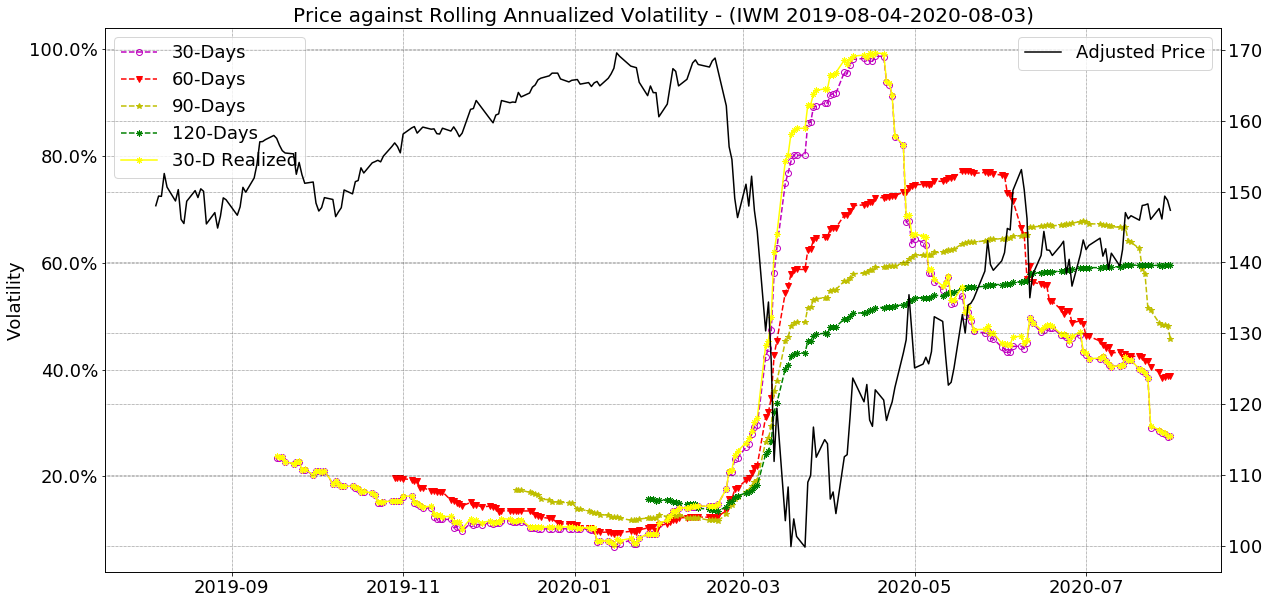

Current Price and Estimated std: 147.36 0.0594
Price Range in one standard deviation: 156.1132 138.6068


In [3]:
orats=True

symbol = 'IWM'

eval_data = '2020-08-03'
dt_start,dt_end=tls.getDates(offset=-365,today_date=eval_data)

threshold=0.08
irate=0.01
desc = symbol + " " + dt_start + "-" + eval_data

prices = pd.DataFrame(datafarm1.get_eod_data(symbol, dt_start, dt_end).interpolate())
cones, vols = pl2.volconesSV(prices)
#realized, roll30, roll, roll60, roll120
mysigma=m.sqrt(vols[0].mean()*100)/100
pl2.plotDiagCones(cones,vols,desc,prices,mysigma)

In [4]:
pl1.plotUnderlyingStudy(symbol,dt_start,dt_end,prices,sigma=mysigma)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Underlying Price Measures
                     Values
Mean Price         146.8322
Median Price       149.3200
Daily Avg BB Range  20.6071
Monthly BB MA Mean 146.7695
Monthly 50 MA Mean 146.7466
Last Price         147.3600


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


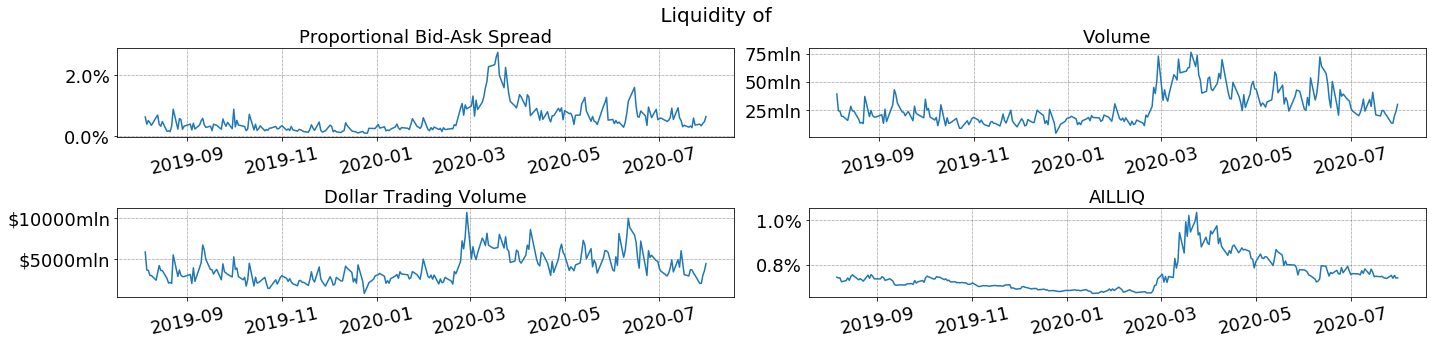

Stock Liquidity Measures
                                          Mean             Median
Proportional Bid-Ask Spread             0.0056             0.0039
Volume                         27,939,190.6016    23,570,007.0000
Dollar Trading Volume       3,905,158,005.3413 3,449,264,385.9564
AILLIQ                                  0.0069             0.0067


In [5]:
df2=pl2.printSecurityLiqStats(prices)

In [6]:
##Long (Call/Put) Diagonal Spread 
# A Long Call/Put Diagonal Spread is constructed by purchasing a call/put far out in time, 
# and selling a near term call/put on a further OTM strike to reduce cost basis. 
# This trade has only two legs, but it gives the effect of a long vertical spread in terms of directionality, 
# and a calendar spread in terms of its positive vega. 
# This results in a bullish position that can benefit from an increase in implied volatility. 

ostype='CALL'
LongShort=1
u_price=prices.Adjusted_close[len(prices)-1]
#average volatility from cones
myvol=vols[0].mean()
print('Estimated Volatility from Cones: ',myvol)

Estimated Volatility from Cones:  0.3522855925759025


In [7]:
if orats==False:
    #IEXCloud data
    options=datafarm1.getAllOptionChainIEX(symbol,irate,myvol)
else:
    #ORATS data
    #options=datafarm2.getOptionsOrats(eval_data,symbol,True)
    options=datafarm2.getOptionsOrats(dt_start,symbol,ddate2=eval_data,greeks=True)
    

In [8]:
maxdate,void=tls.getDates(offset=+360,today_date=eval_data)
ret=pl2.plot3DVol(options,maxdate=maxdate,otype=ostype,desc=desc)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


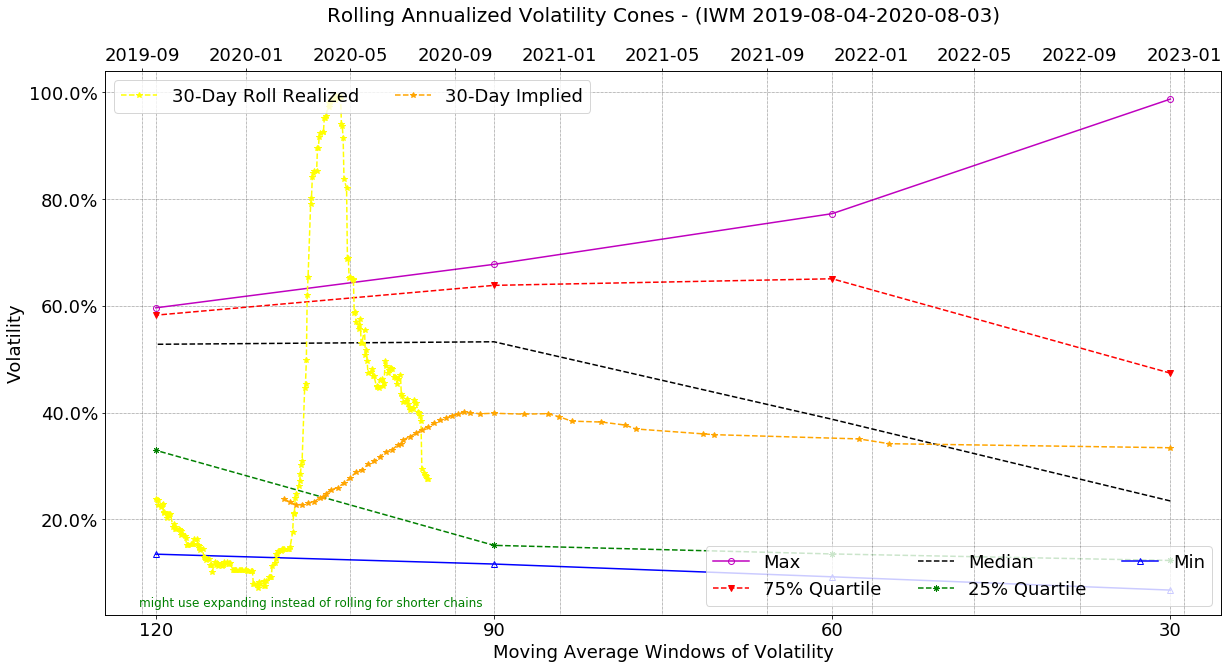

Options IVol Stats (see note in graph, if present)
                             Values
Min 52W Implied Vol (%)       22.74
Max 52W Implied Vol (%)       40.09
Last Implied Vol (%)          37.36
IV Rank (over 252 days)       84.25
IV Perc (over 252 days) (%)   68.75
Current Price                147.36
Estimated Mean iVol (%)       32.96
Min Expected Price 30-Days   140.40
Max Expected Price 30-Days   154.32


In [9]:
iSVol,iVol,optionsATM=pl2.compute30DVol(options,ostype,dt_start,dt_end,u_price)
pl2.plotVolConesSV(symbol,dt_start,eval_data,iVol,options,prices)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


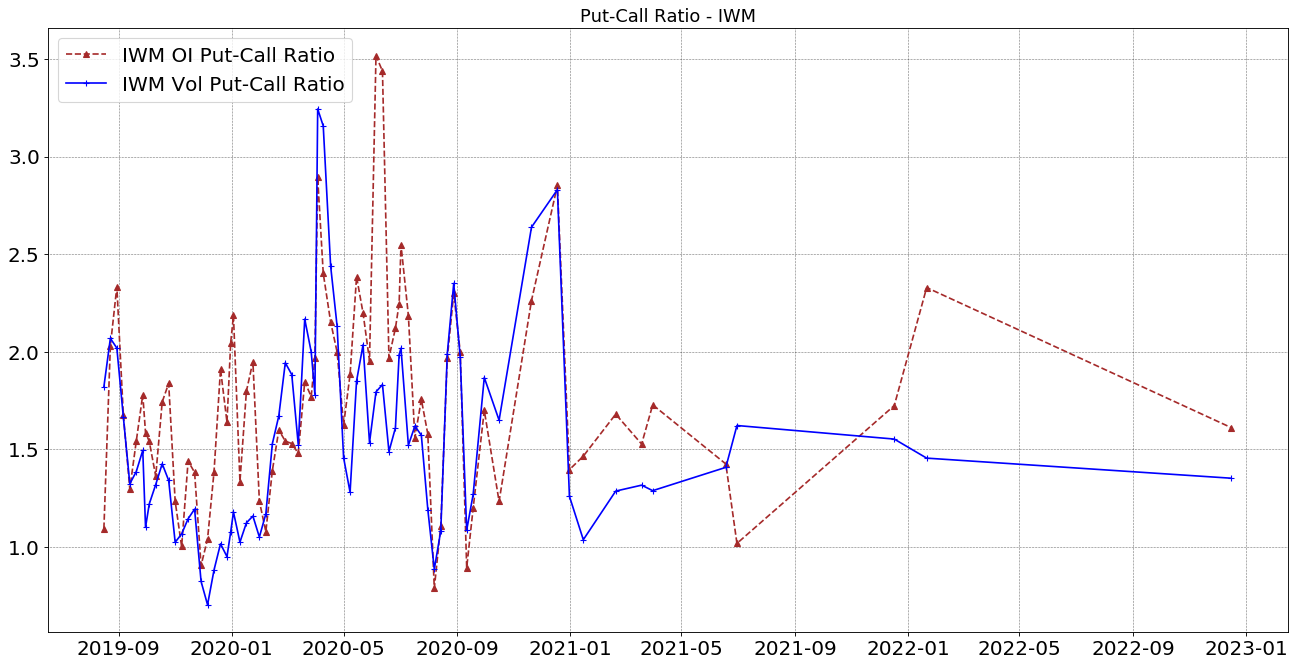

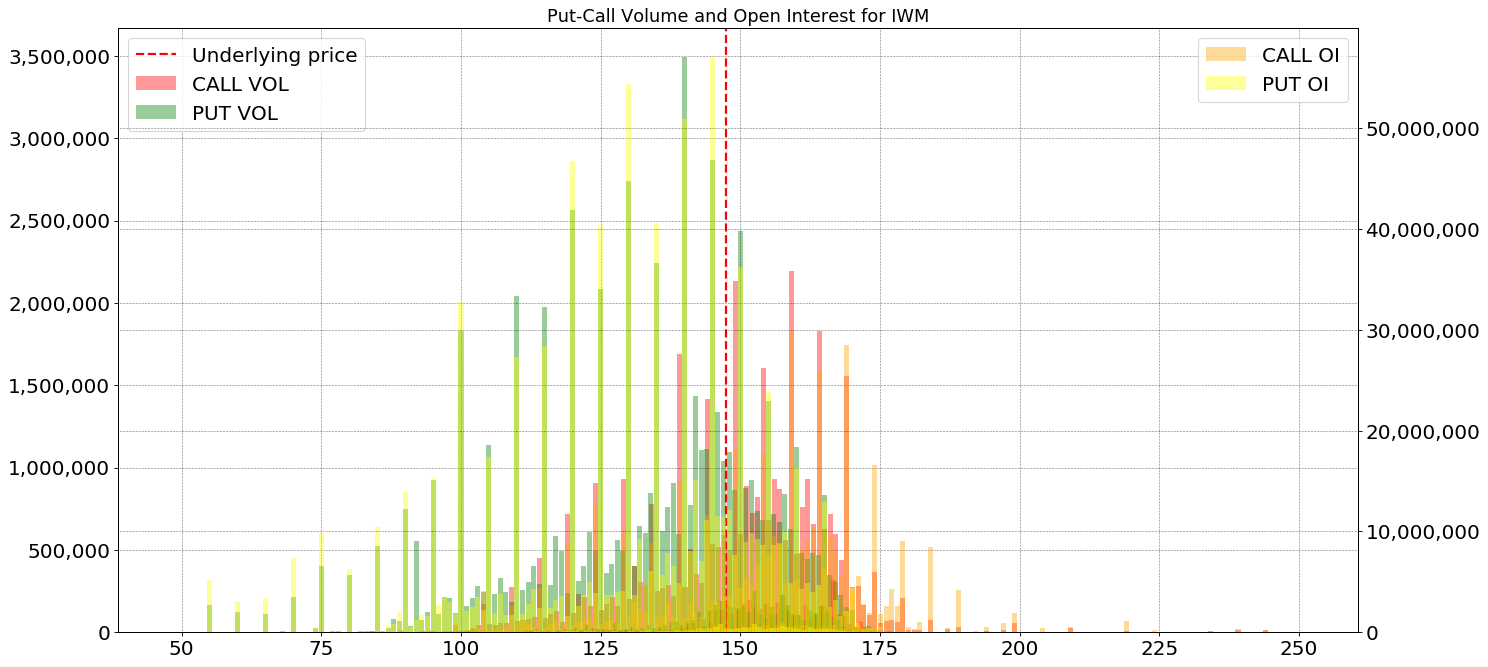

In [10]:
pl2.plotPCRatio(symbol, options,pcr_type='PCR_EQUITY')
pl2.plotPCVolOI(symbol, options,u_price)

/Users/rob/.local/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


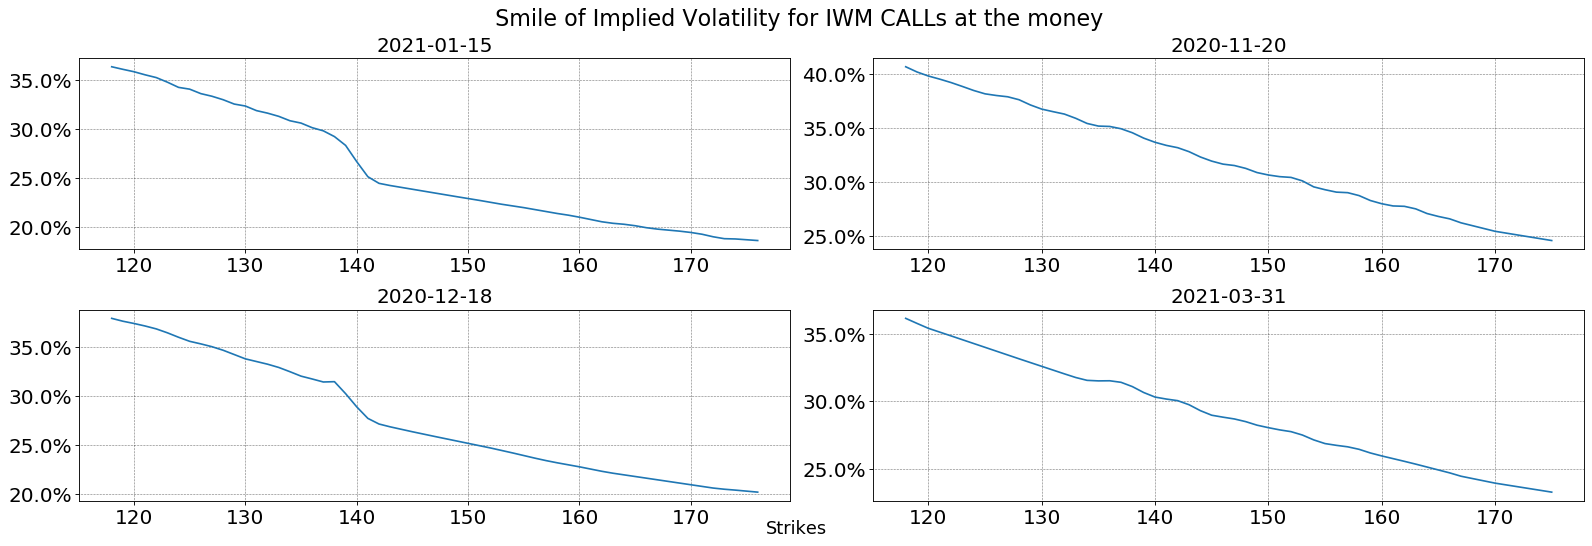

                        Values
Price                   147.36
Mean IV 2021-01-15 (%)   26.36
Mean IV 2020-11-20 (%)   33.50
Mean IV 2020-12-18 (%)   24.09
Mean IV 2021-03-31 (%)   30.42


In [11]:
expdata=['2021-01-15','2020-11-20','2020-12-18','2021-03-31']
pl2.plotSmileEATM(ostype, options, symbol,  expdata,u_price,interp=True)


In [12]:
#Long Call Diagonal Spread
#Buy an in-the-money (ITM) call option in a longer-term expiration cycle (Expiration 2)
#Sell an out-of-the-money (OTM) call option in a near-term expiration cycle (Expiration 1)
fbo,co=o.getExpDiagSpread2(ostype,eval_data,u_price,options,2*m.sqrt(myvol*100)/100)
fbo.head(20)



EDate1     EDate2  Strike1  Strike2
0 2021-01-15 2020-11-20   165.00   147.00
1 2020-09-18 2021-03-31   165.00   147.00
2 2020-09-30 2021-02-19   165.00   147.00
3 2020-12-18 2020-09-04   165.00   147.00
4 2020-12-31 2020-09-11   165.00   147.00
5 2021-01-15 2020-11-20   183.00   147.00
6 2020-09-18 2021-03-31   183.00   147.00
7 2020-09-30 2021-02-19   183.00   147.00
8 2020-12-18 2020-09-04   183.00   147.00
9 2020-12-31 2020-09-11   183.00   147.00

CALLs Liquidity Measures - Mean/Median


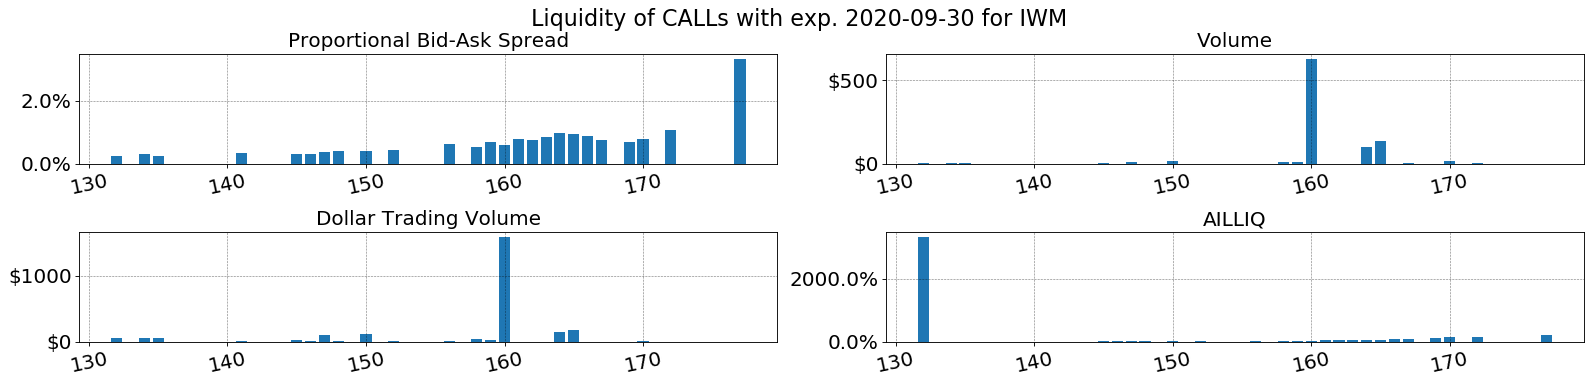

                                Mean  Median
Proportional Bid-Ask Spread   0.0121  0.0045
Volume                      189.0543 10.0000
Dollar Trading Volume       595.8120 50.0750
AILLIQ                        2.6302  0.1755
CALLs Liquidity Measures - Mean/Median


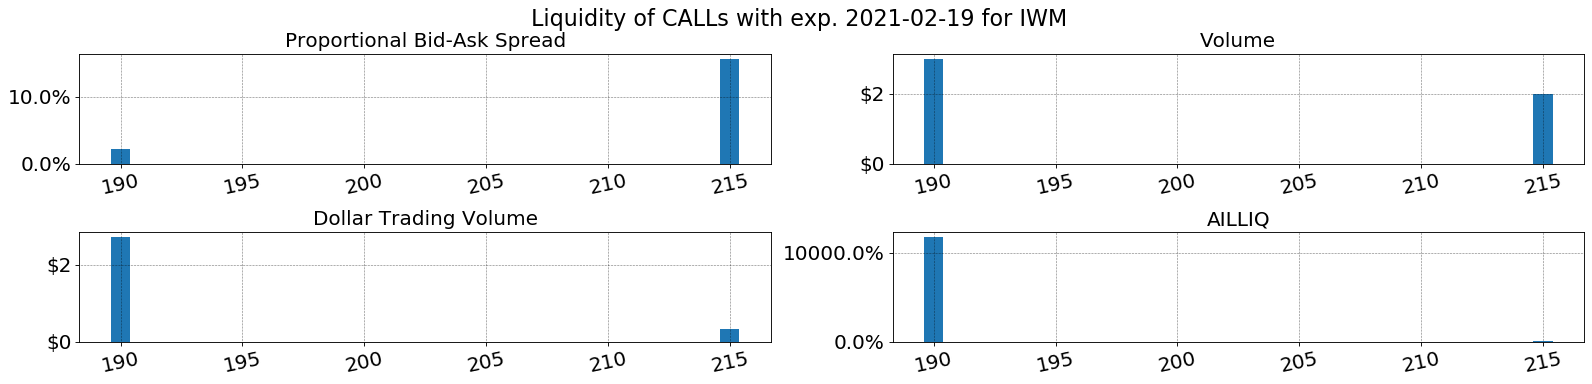

                                Mean  Median
Proportional Bid-Ask Spread   0.0121  0.0045
Volume                      189.0543 10.0000
Dollar Trading Volume       595.8120 50.0750
AILLIQ                        2.6302  0.1755


In [13]:
Expiration_N=2
d1=str(fbo.iloc[Expiration_N][0].date())
d2=str(fbo.iloc[Expiration_N][1].date())
df1=pl2.printOptLiqStats(options[options.index==eval_data],ostype,symbol,d1)
df1=pl2.printOptLiqStats(options[options.index==eval_data],ostype,symbol,d2)


In [14]:
fb=o.getDiagSpreads(Expiration_N,co,fbo)

fb.head(10)

expirationDate_x type_x  strike_x  lastPrice_x  impliedVolatility_x  dte_x  \
0       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
1       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
2       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
3       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
4       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
5       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
6       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
7       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
8       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   
9       2020-09-30   CALL  165.0000       4.4700               0.1708 1.0000   

  expirationDate_y type_y  strike_y  lastPrice_y  ...  delta_x  gamma_x  \
0       2021-02-19   CALL  147.0000      12.4700  ...   0.3014   0.0137   
1       2021-02-19   CALL  147.0000      12.1300  ...   0.3014   0.0137   
2       2021-02-19   CALL  147.0000      12.1300  ...   0.3014   0.0137   
3       2021-02-19   CALL  147.0000      12.5300  ...   0.3014   0.0137   
4       2021-02-19   CALL  147.0000      10.6200  ...   0.3014   0.0137   
5       2021-02-19   CALL  147.0000      10.5000  ...   0.3014   0.0137   
6       2021-02-19   CALL  147.0000       9.6000  ...   0.3014   0.0137   
7       2021-02-19   CALL  147.0000      10.7900  ...   0.3014   0.0137   
8       2021-02-19   CALL  147.0000      11.6100  ...   0.3014   0.0137   
9       2021-02-19   CALL  147.0000      10.9400  ...   0.3014   0.0137   

   theta_x  vega_x  rho_x  delta_y  gamma_y  theta_y  vega_y  rho_y  
0  -0.0123  0.5041 0.3966   0.4894   0.0106  -0.0295  0.4610 0.3397  
1  -0.0123  0.5041 0.3966   0.4854   0.0108  -0.0290  0.4599 0.3354  
2  -0.0123  0.5041 0.3966   0.4915   0.0111  -0.0286  0.4589 0.3378  
3  -0.0123  0.5041 0.3966   0.5033   0.0111  -0.0287  0.4646 0.3454  
4  -0.0123  0.5041 0.3966   0.4557   0.0112  -0.0282  0.4422 0.3085  
5  -0.0123  0.5041 0.3966   0.4591   0.0115  -0.0276  0.4428 0.3121  
6  -0.0123  0.5041 0.3966   0.4353   0.0116  -0.0272  0.4378 0.2925  
7  -0.0123  0.5041 0.3966   0.4681   0.0116  -0.0280  0.4492 0.3128  
8  -0.0123  0.5041 0.3966   0.4949   0.0118  -0.0277  0.4533 0.3331  
9  -0.0123  0.5041 0.3966   0.4852   0.0122  -0.0269  0.4514 0.3268  

[10 rows x 22 columns]

In [15]:
sLegs=o.getDSLegs(0,fb)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/rob/.local/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:215: RuntimeWarning: invalid value encountered in greater_equal
  frac=frac, it=it, delta=delta, given_xvals=False)


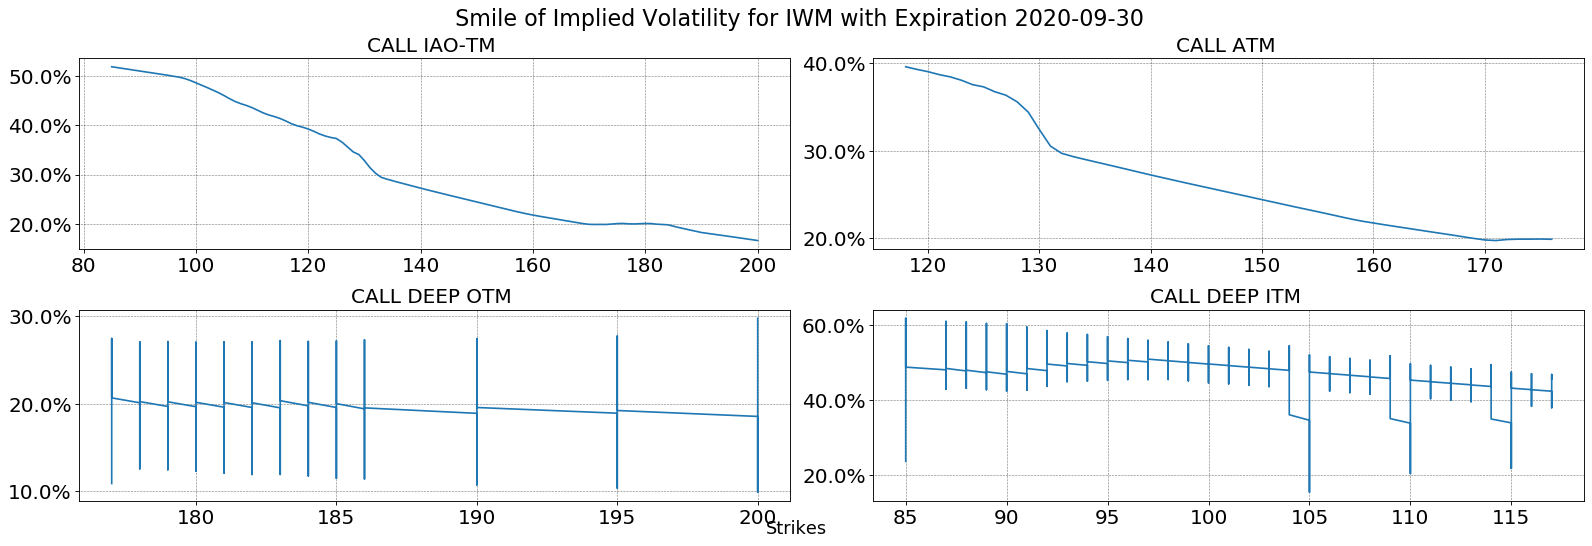

                      Values
Price                 147.36
Mean IV Deep OTM (%)   19.22
Mean IV ATM (%)        25.81
Mean IV IAO-TM (%)     29.06
Mean IV Deep ITM (%)   45.77


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/rob/.local/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:215: RuntimeWarning: invalid value encountered in true_divide
  frac=frac, it=it, delta=delta, given_xvals=False)
/Users/rob/.local/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:215: RuntimeWarning: invalid value encountered in greater_equal
  frac=frac, it=it, delta=delta, give

                      Values
Price                 147.36
Mean IV Deep OTM (%)   22.63
Mean IV ATM (%)        30.78
Mean IV IAO-TM (%)     31.72
Mean IV Deep ITM (%)   43.19


In [16]:
pl2.plotSmile(ostype, options, symbol, fb['expirationDate_x'].iloc[0].strftime("%Y-%m-%d"),u_price)
pl2.plotSmile(ostype, options, symbol, fb['expirationDate_y'].iloc[0].strftime("%Y-%m-%d"),u_price)

In [17]:
opts_list=o.getDSLegs2(30,fb,sigma=0.2,ir=0.03)
opt.plotGreeks2(int(u_price), opts_list,title='Strategy Greeks as function of Underlying',fs=(12,10))

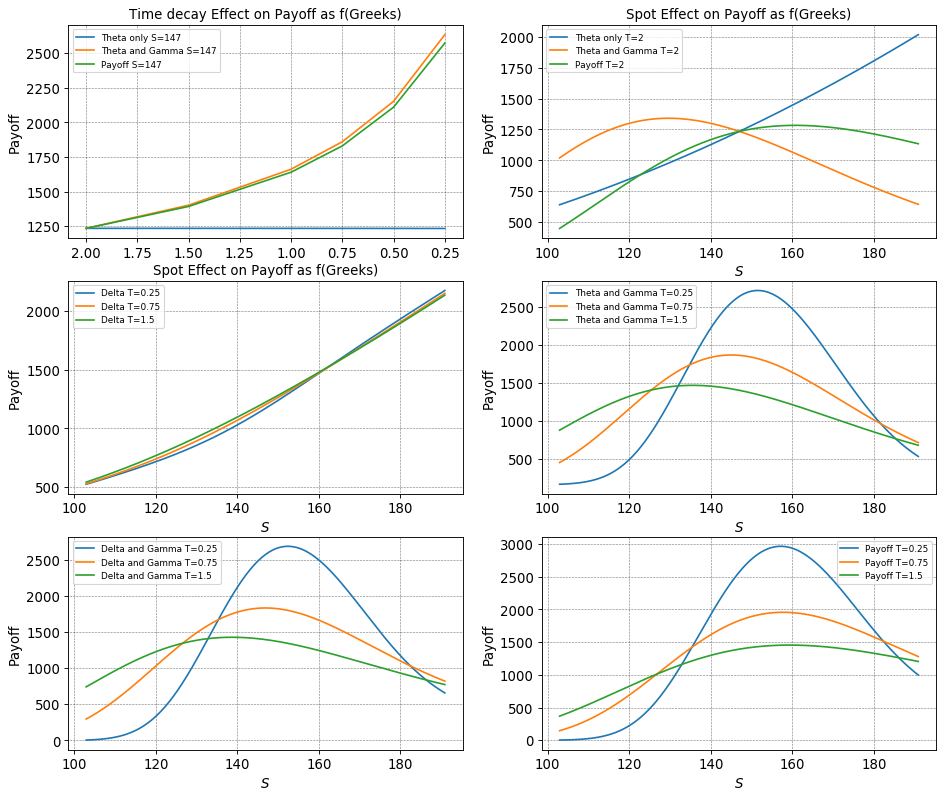

In [18]:
opt.plotGreeksPayoff2(int(u_price), opts_list, LongShort=1, r=0.03, prange=[0.30,0.30],step=0.25,fs=(14,12))

In [19]:
opt.makeDGHTable(o.getDSLegs3(30,fb, int(u_price), ir=0.03), prange=int(u_price*(myvol**2))/2)

Hedging requires  -0.3646 units of underlying
Hedging requires  1.2259 units of another derivative and  41.2744 cash


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


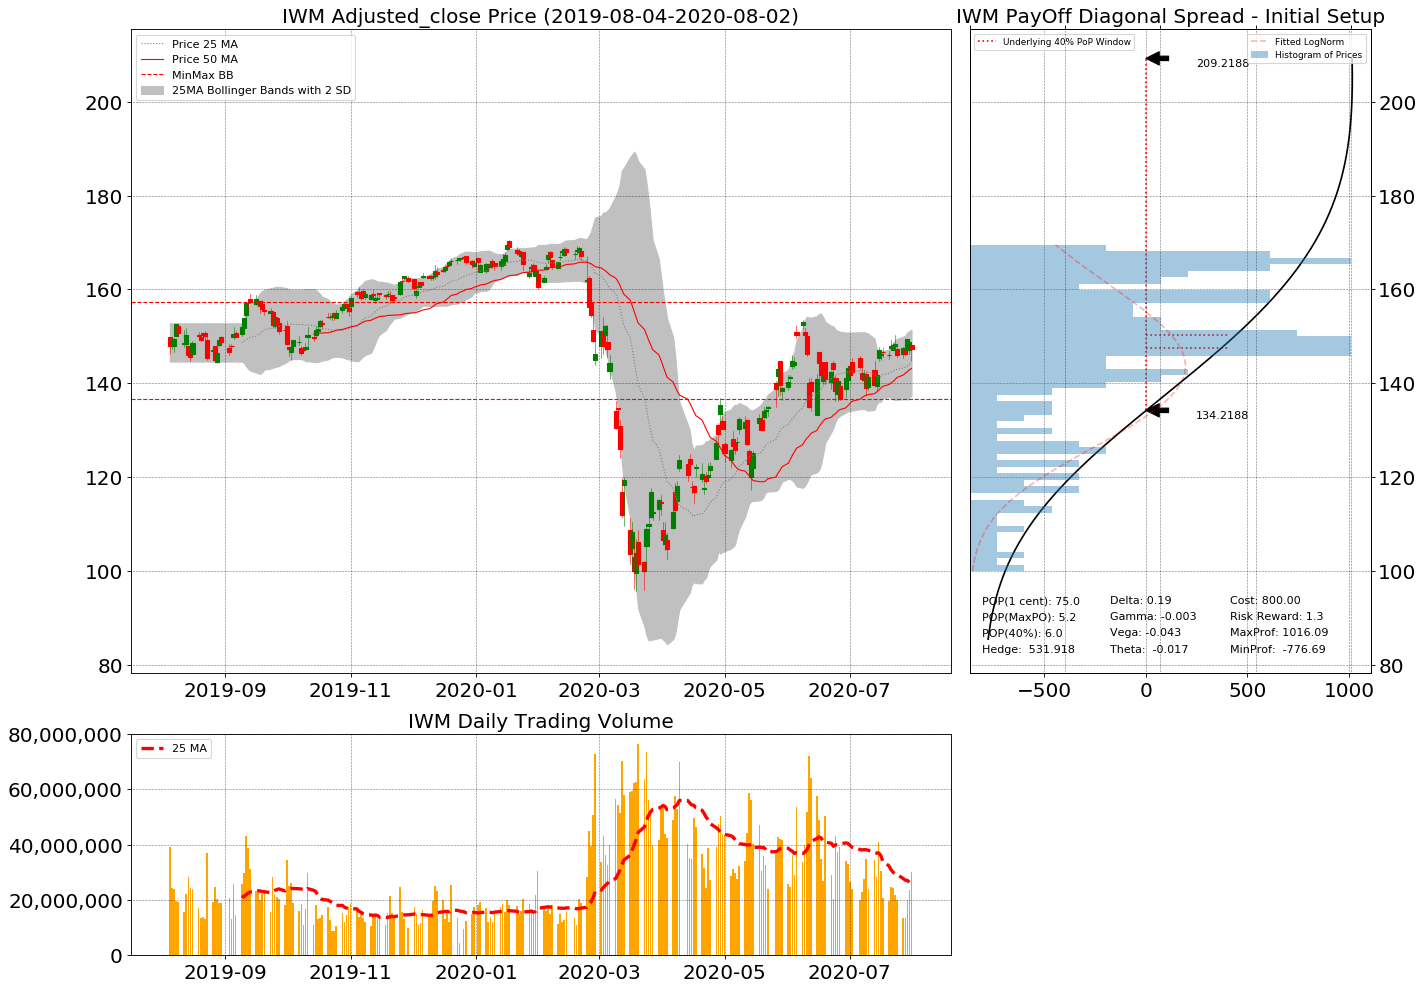

In [20]:
r1=o.diagonalSpread(sLegs,u_price,irate,desc,0.42,LongShort)
clear_output(wait=True)
desc='Diagonal Spread - Initial Setup'
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r1,desc,prb=0.40)

In [21]:
psLegs=sLegs
psLegs[3],psLegs[12]=0.0001,(sLegs[12]-(sLegs[3]-0.0001))

desc='First Expiration - IV Unchanged'
r2=o.diagonalSpread(psLegs,u_price,irate,desc,0.42,LongShort)
clear_output(wait=True)
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r2,desc,prb=0.25)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


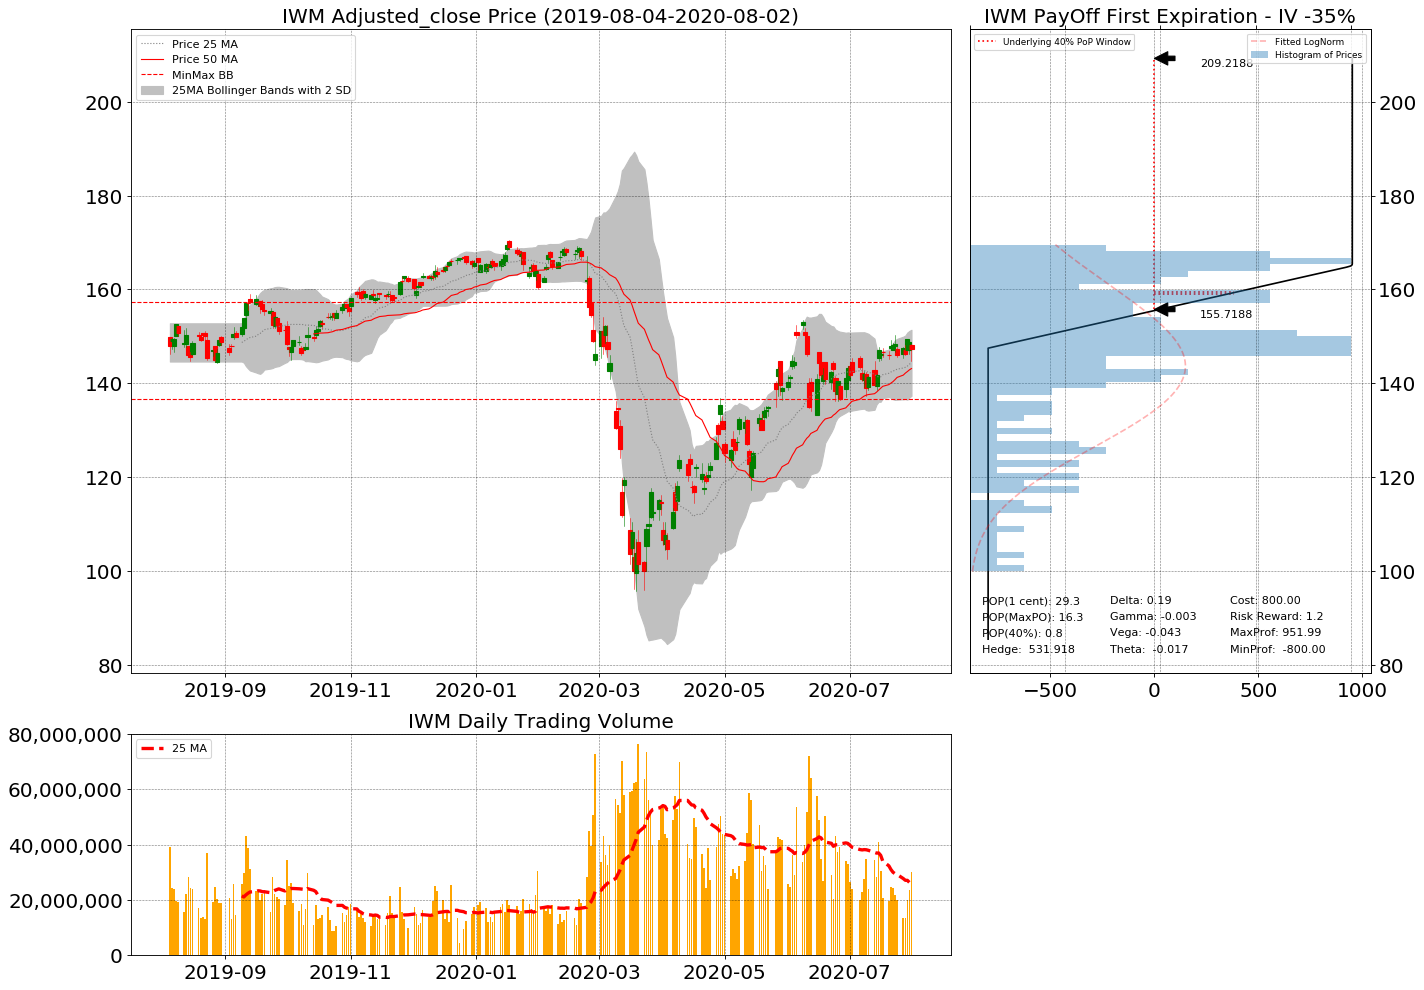

In [22]:
psLegs=sLegs
psLegs[2],psLegs[11]=sLegs[2]*(0.65),sLegs[11]*(0.65)

desc='First Expiration - IV -35%'
r3=o.diagonalSpread(psLegs,u_price,irate,desc,0.42,LongShort)
clear_output(wait=True)
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r3,desc,prb=0.40)

/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/rob/opt/intelpython/latest/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


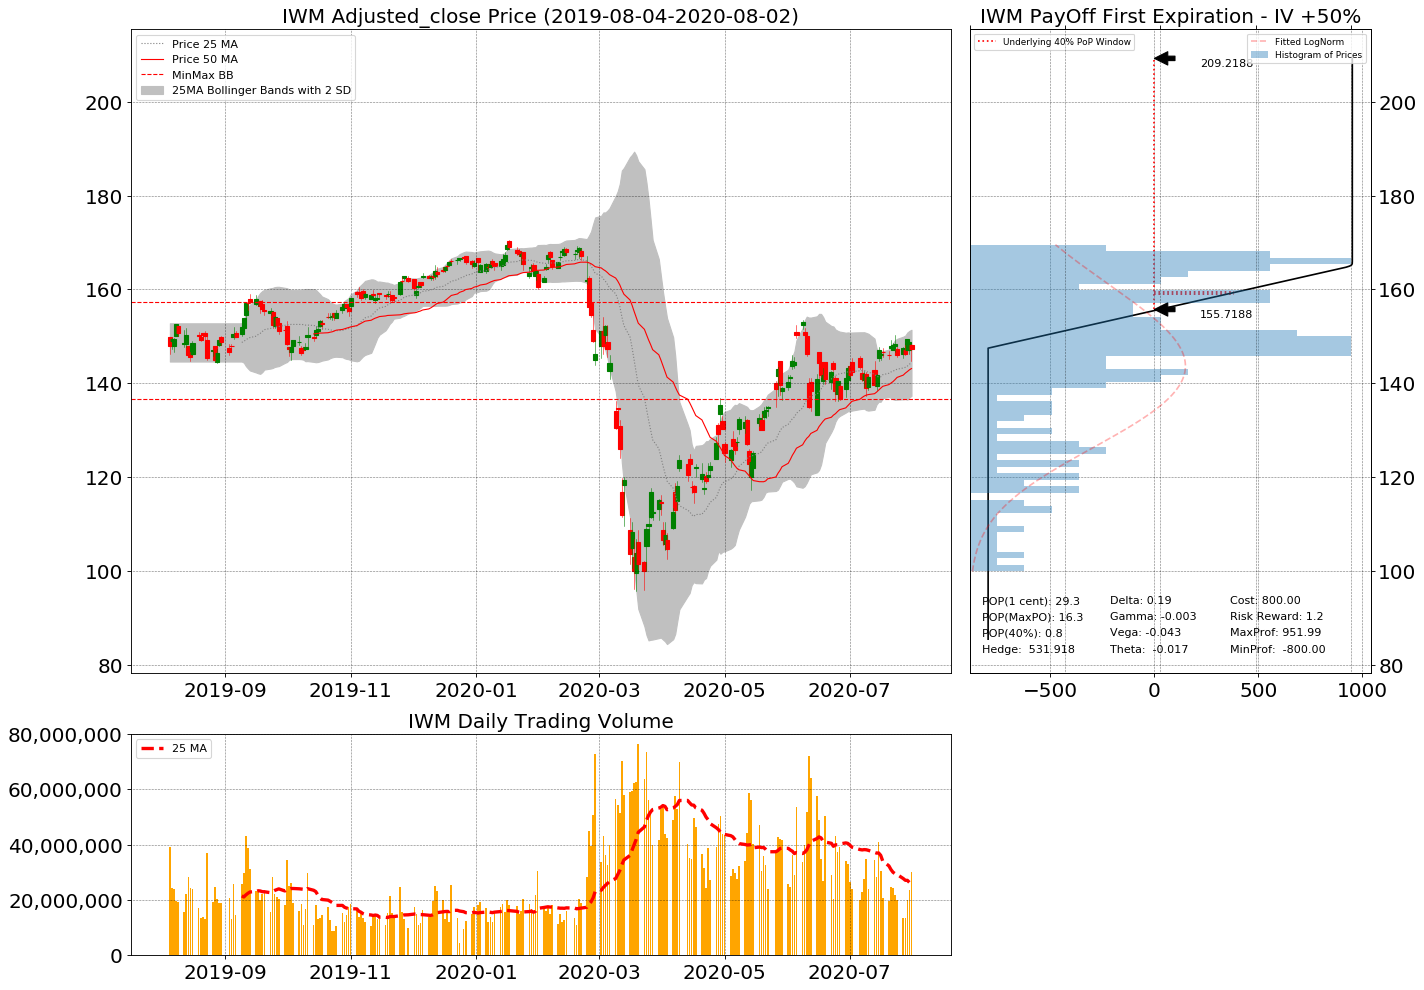

In [23]:
psLegs=sLegs
psLegs[2],psLegs[11]=sLegs[2]*(1.5),sLegs[11]*(1.5)

desc='First Expiration - IV +50%'
r4=o.diagonalSpread(psLegs,u_price,irate,desc,0.42,LongShort)
clear_output(wait=True)
pl1.plotUnderlyingStudy2(symbol, dt_start, dt_end, prices,r4,desc,prb=0.40)